# Install Libraries

In [1]:
! pip install -q kaggle

# Import dataset from kaggle

In [3]:
! mkdir ~/.kaggle
! cp "/content/drive/MyDrive/Colab Notebooks/kaggle json/kaggle.json" ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! kaggle datasets download -d "ashydv/advertising-dataset"
! mkdir dataset
! unzip advertising-dataset.zip -d dataset

  0% 0.00/1.83k [00:00<?, ?B/s]
100% 1.83k/1.83k [00:00<00:00, 3.58MB/s]
mkdir: cannot create directory ‘dataset’: File exists
Archive:  advertising-dataset.zip
  inflating: dataset/advertising.csv  


# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings("ignore")
%matplotlib inline

# Reading the Dataset

In [6]:
df = pd.read_csv('dataset/advertising.csv')

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Explore Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Outlier analysis

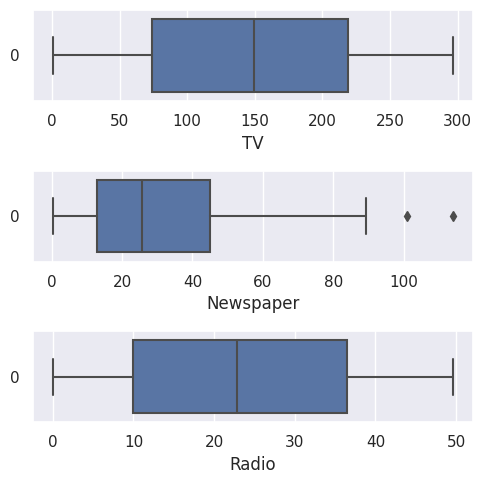

In [10]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize=(5, 5))

plt1 = sns.boxplot(df['TV'], ax=axs[0], orient='h')
axs[0].set_xlabel('TV')
plt2 = sns.boxplot(df['Newspaper'], ax=axs[1], orient='h')
axs[1].set_xlabel('Newspaper')
plt3 = sns.boxplot(df['Radio'], ax=axs[2], orient='h')
axs[2].set_xlabel('Radio')

plt.tight_layout()
plt.show()

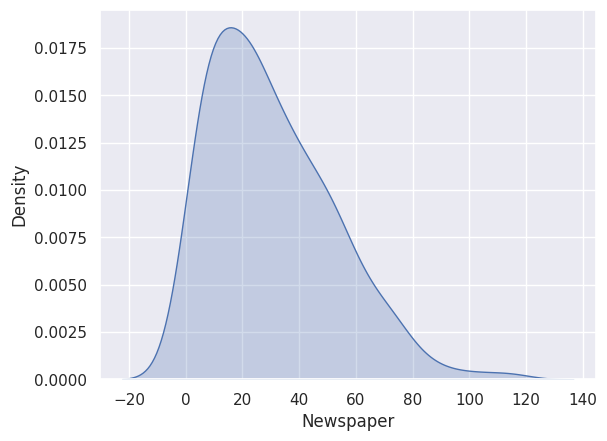

In [11]:
sns.kdeplot(df['Newspaper'], shade=True)
plt.show()

##### IQR

In [12]:
newspaper_column = df['Newspaper']
q1 = np.percentile(newspaper_column, 25)
q3 = np.percentile(newspaper_column, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("IQR for 'Newspaper' column:", iqr)
print(lower_bound)
print(upper_bound)

IQR for 'Newspaper' column: 32.35
-35.775000000000006
93.625


In [13]:
new_df = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]
new_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
new_df.shape

(198, 4)

### EDA

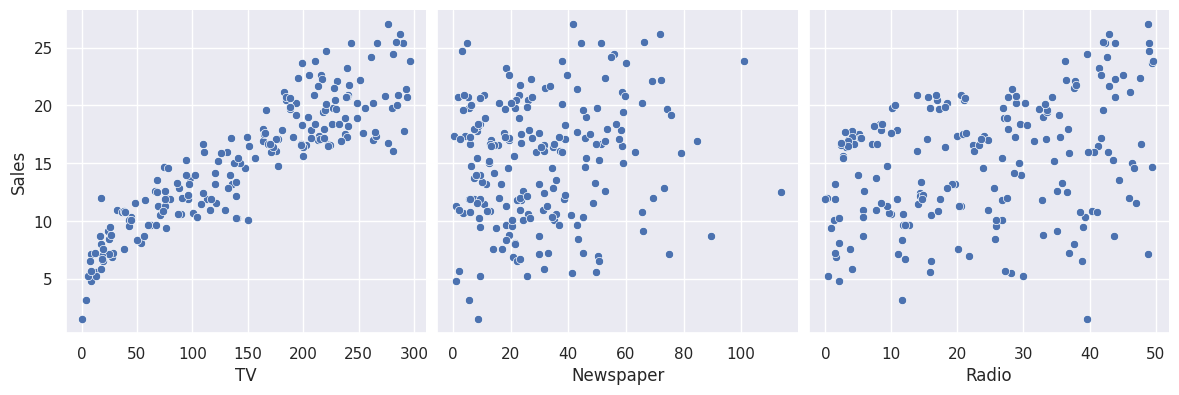

In [15]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

Here, the sales and tv shows the linear relationship

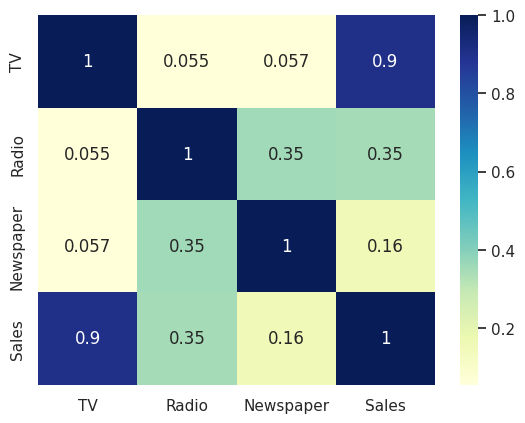

In [16]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Here the sales and TV are highly correlated


# Model


Equation of linear regression

y=c+m1x1+m2x2+...+mnxn

**y
  is the response**

**c
  is the intercept**

**m1
  is the coefficient for the first feature**

**mn
  is the coefficient for the nth feature**

In our case:

***y = c + m1 × data***

In [17]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

def split_data(x ,y, test_size : int = 0.3) -> list:
  return train_test_split(x, y,test_size = test_size, random_state = 100)

def train_sm(X_train, y_train):
  # Add a constant to get an intercept
  X_train_sm = sm.add_constant(X_train)

  # Fit the resgression line using 'OLS'
  return sm.OLS(y_train, X_train_sm).fit(), X_train_sm

## First we try with TV column

In [18]:
X = df['TV']
y = df['Sales']

X_train, X_test, y_train, y_test = split_data(X,y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [19]:
lr, X_train_sm = train_sm(X_train, y_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.52e-52
Time:                        10:47:51   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

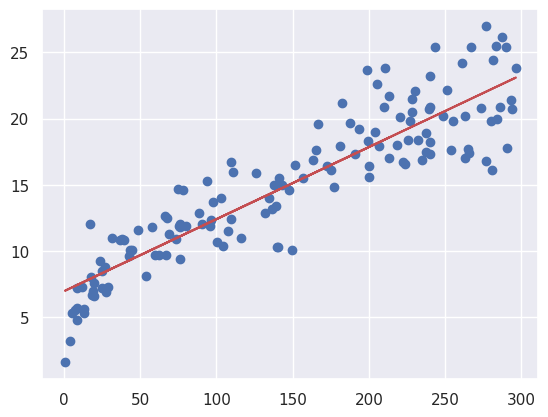

In [20]:
coef = 6.9487
intercept = 0.0545

plt.scatter(X_train, y_train)
plt.plot(X_train, coef + intercept * X_train, 'r')
plt.show()

### Residue Analysis (model with TV feature)

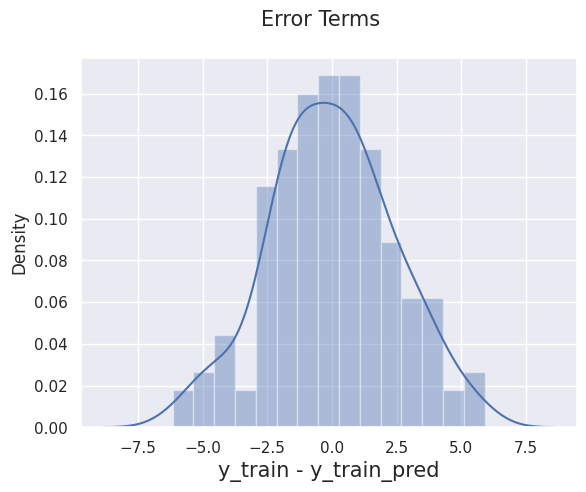

In [21]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [22]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

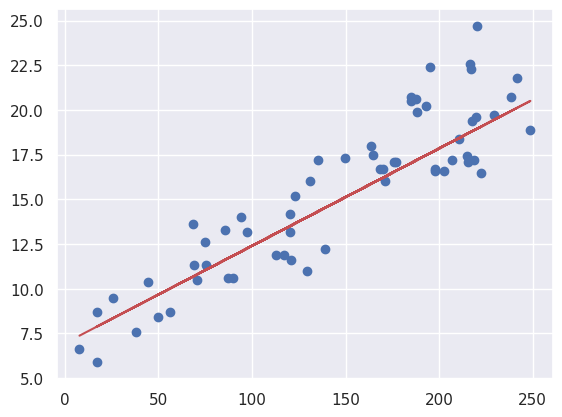

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, coef + intercept * X_test, 'r')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
r_squared, mse

(0.792103160124566, 2.019296008966232)

## With all the columns

In [26]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']

X_train, X_test, y_train, y_test = split_data(X,y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [27]:
lr, X_train_sm = train_sm(X_train, y_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           4.73e-71
Time:                        10:48:13   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3346      0.357     12.139      0.0

In [28]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

mse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
r_squared, mse

(0.8655979373420264, 1.6235998775338956)

In [29]:
from sklearn.linear_model import LinearRegression

### LinearRegression

In [30]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']

X_train, X_test, y_train, y_test = split_data(X,y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [31]:
linr = LinearRegression()
linr.fit(X_train, y_train)
linr.score(X_test, y_test)

0.8655979373420272

In [32]:
y_pred = linr.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
r_squared, mse

(0.8655979373420272, 1.623599877533891)

In [33]:
coef = linr.coef_
intcpt = linr.intercept_

coef, intcpt

(array([0.05382911, 0.11001224, 0.00628995]), 4.334595861728431)

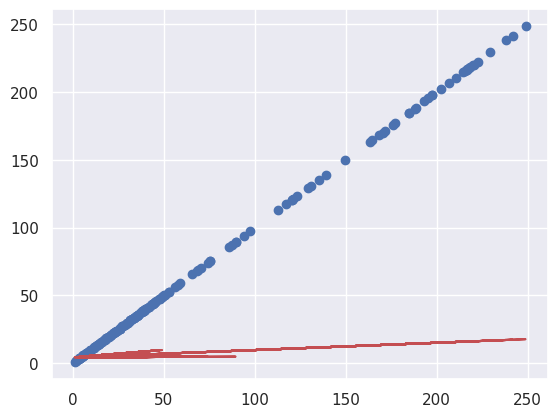

In [34]:
plt.scatter(X_test, X_test)
plt.plot(X_test, coef * X_test + intcpt, 'r')
plt.show()

#### Test

In [35]:
linr_test = [[230.1, 37.8, 69.2], [44.5, 39.3, 45.1], [180.8, 10.8, 58.4]]
linr_test_y = [22.1, 10.4, 17.9]

for idx, test in enumerate(linr_test):
  # Perform the manual linear regression calculation
  sales = np.sum(coef * np.array(test)) + intcpt
  print(f"Predicted: {sales}, Actual: {linr_test_y[idx]}")

Predicted: 21.314401135049835, Actual: 22.1
Predicted: 11.337149133714853, Actual: 10.4
Predicted: 15.622364031265526, Actual: 17.9
